In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("dataset_avocado.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
# Diccionario de renombrado
columnas_espanol = {
    'Unnamed: 0': 'id_registro',
    'Date': 'fecha',
    'AveragePrice': 'precio_promedio',
    'Total Volume': 'volumen_total',
    '4046': 'volumen_tipo_4046',
    '4225': 'volumen_tipo_4225',
    '4770': 'volumen_tipo_4770',
    'Total Bags': 'bolsas_totales',
    'Small Bags': 'bolsas_pequenas',
    'Large Bags': 'bolsas_grandes',
    'XLarge Bags': 'bolsas_extra_grandes',
    'type': 'tipo_producto',
    'year': 'anio',
    'region': 'region'
}

# Renombrar columnas
data = data.rename(columns=columnas_espanol)
data.columns

Index(['id_registro', 'fecha', 'precio_promedio', 'volumen_total',
       'volumen_tipo_4046', 'volumen_tipo_4225', 'volumen_tipo_4770',
       'bolsas_totales', 'bolsas_pequenas', 'bolsas_grandes',
       'bolsas_extra_grandes', 'tipo_producto', 'anio', 'region'],
      dtype='object')

In [5]:
data.dtypes

id_registro               int64
fecha                    object
precio_promedio         float64
volumen_total           float64
volumen_tipo_4046       float64
volumen_tipo_4225       float64
volumen_tipo_4770       float64
bolsas_totales          float64
bolsas_pequenas         float64
bolsas_grandes          float64
bolsas_extra_grandes    float64
tipo_producto            object
anio                      int64
region                   object
dtype: object

In [6]:
data['fecha'] = pd.to_datetime(data['fecha'], format='%Y-%m-%d', errors='coerce')
data.dtypes

id_registro                      int64
fecha                   datetime64[ns]
precio_promedio                float64
volumen_total                  float64
volumen_tipo_4046              float64
volumen_tipo_4225              float64
volumen_tipo_4770              float64
bolsas_totales                 float64
bolsas_pequenas                float64
bolsas_grandes                 float64
bolsas_extra_grandes           float64
tipo_producto                   object
anio                             int64
region                          object
dtype: object

In [7]:
data.sample(5)

,id_registro,fecha,precio_promedio,volumen_total,volumen_tipo_4046,volumen_tipo_4225,volumen_tipo_4770,bolsas_totales,bolsas_pequenas,bolsas_grandes,bolsas_extra_grandes,tipo_producto,anio,region
16902,41,2017-03-19,2.46,5971.13,1795.34,3449.75,0.00,726.04,726.04,0.00,0.00,organic,2017,Sacramento
16931,17,2017-09-03,2.01,15165.11,1139.04,10923.85,0.00,3102.22,3102.22,0.00,0.00,organic,2017,SanDiego
7272,13,2017-10-01,2.00,262601.79,166612.29,29616.83,15.20,66357.47,42497.48,23856.66,3.33,conventional,2017,Orlando
437,21,2015-08-02,1.27,761027.42,21607.12,559825.17,97419.33,82175.80,79197.97,2476.30,501.53,conventional,2015,Chicago
14442,13,2016-09-25,1.50,5873.36,1707.38,708.57,0.00,3457.41,1017.25,2440.16,0.00,organic,2016,StLouis


In [8]:
print(f"Dimensiones iniciales: {data.shape}")
print(f"Cantidad de duplicados: {data.duplicated().sum()}")
print(f"Conteo de valores nulos por columna: {data.duplicated().sum()}")


Dimensiones iniciales: (18249, 14)
Cantidad de duplicados: 0
Conteo de valores nulos por columna: 0


In [9]:
registros_totalus = data[data['region'] == 'TotalUS'].shape[0]
registros_totalus

338

In [10]:
data_sin_totalus = data[data['region'] != 'TotalUS'].copy()
print(f"Dimensiones despues: {data_sin_totalus.shape}")

Dimensiones despues: (17911, 14)


In [11]:
# Columnas clave para análisis de negocio
columnas_analisis = [
    'precio_promedio',
    'volumen_total',
    'volumen_tipo_4046',
    'volumen_tipo_4225',
    'volumen_tipo_4770',
    'bolsas_totales',
    'bolsas_pequenas',
    'bolsas_grandes',
    'bolsas_extra_grandes'
]

# Resumen estadístico
resumen_numerico = data[columnas_analisis].describe().T

resumen_numerico

,count,mean,std,min,25%,50%,75%,max
precio_promedio,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
volumen_total,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
volumen_tipo_4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
volumen_tipo_4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
volumen_tipo_4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
bolsas_totales,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
bolsas_pequenas,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
bolsas_grandes,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
bolsas_extra_grandes,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


In [12]:
df_box = data_sin_totalus[columnas_analisis].copy()

# Log solo a volúmenes
# Se aplicó transformación logarítmica (log1p) únicamente a las variables de volumen
# debido a su alta dispersión y presencia de valores extremos. 
# Esta transformación permite reducir la asimetría de la distribución, mejorar la visualización en gráficos estadísticos 
# y facilitar la identificación de valores atípicos reales. No se aplicó al precio promedio, ya que este presenta una
# escala estable y directa para interpretación de negocio.

for col in df_box.columns:
    if col != 'precio_promedio':
        df_box[col] = np.log1p(df_box[col])

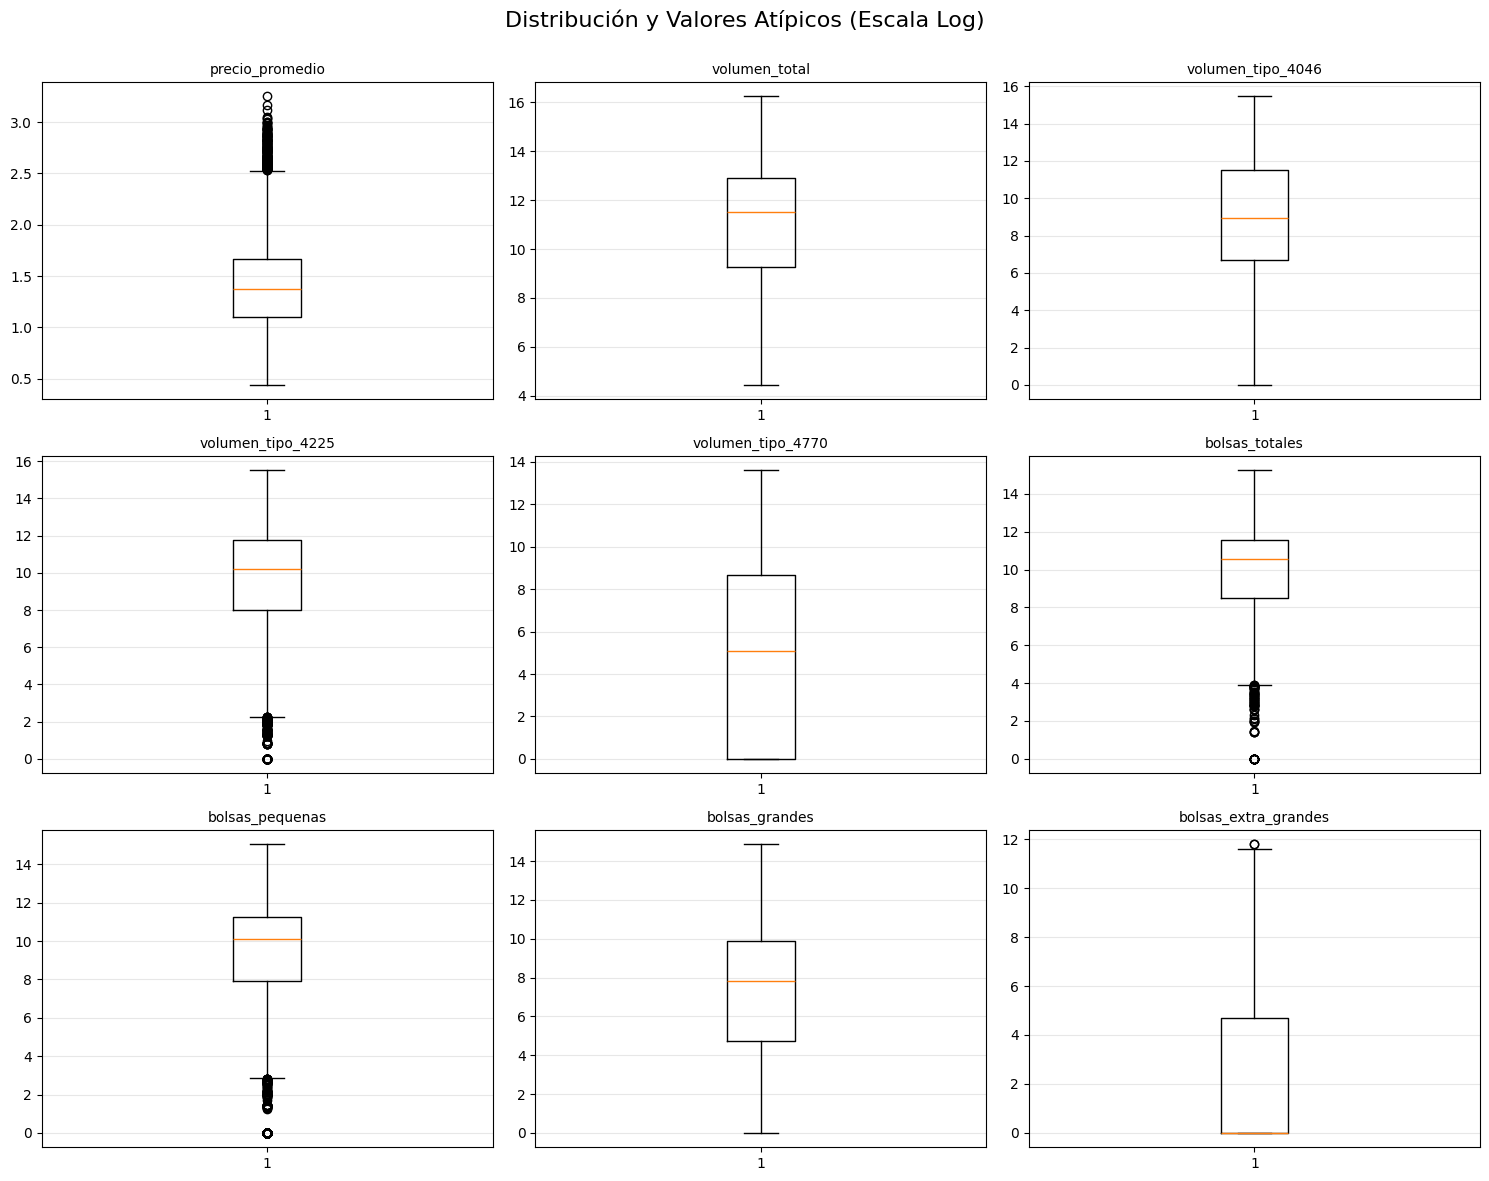

In [13]:
# Crear grilla 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

# Aplanar matriz de ejes
axes = axes.flatten()

# Graficar cada variable
for i, col in enumerate(df_box.columns):
    
    axes[i].boxplot(
        df_box[col].dropna(),
        showfliers=True
    )
    
    axes[i].set_title(col, fontsize=10)
    axes[i].grid(axis='y', alpha=0.3)

# Ajustar diseño
fig.suptitle(
    'Distribución y Valores Atípicos (Escala Log)',
    fontsize=16
)

plt.tight_layout()
plt.subplots_adjust(top=0.92)

plt.show()

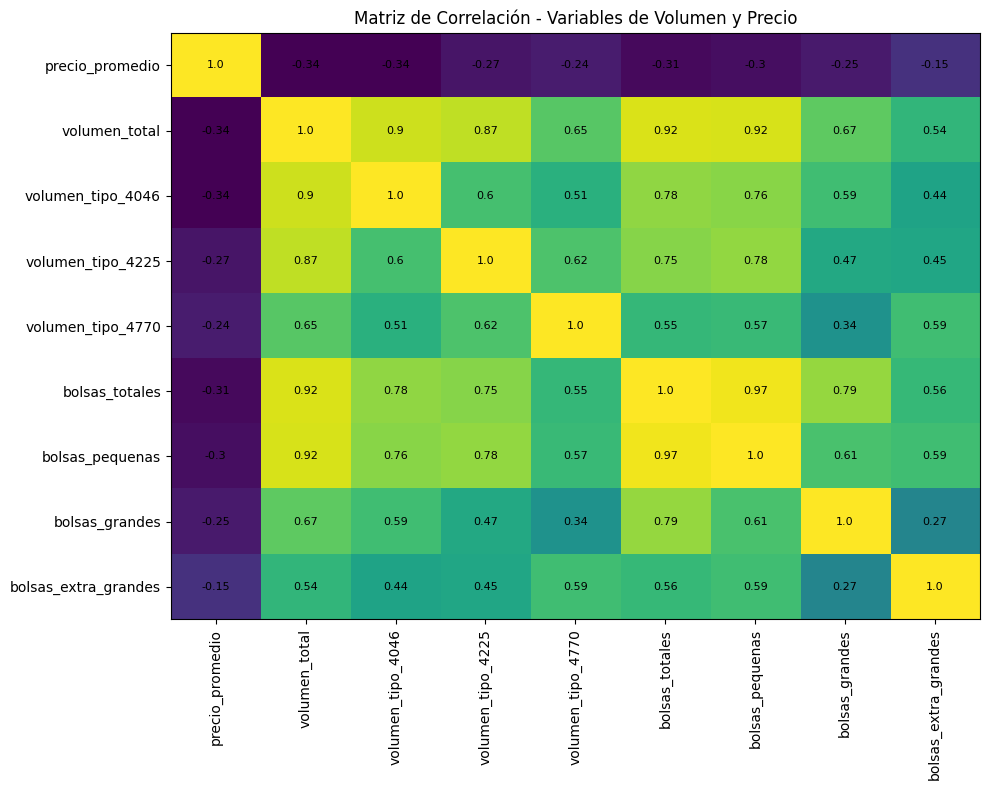

In [14]:
df_corr = data_sin_totalus[columnas_analisis].corr()

# Crear figura
fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar matriz
cax = ax.imshow(df_corr, aspect='auto')

# Etiquetas
ax.set_xticks(np.arange(len(columnas_analisis)))
ax.set_yticks(np.arange(len(columnas_analisis)))
ax.set_xticklabels(columnas_analisis, rotation=90)
ax.set_yticklabels(columnas_analisis)

# Mostrar valores
for i in range(len(columnas_analisis)):
    for j in range(len(columnas_analisis)):
        ax.text(j, i, round(df_corr.iloc[i, j], 2),
                ha="center", va="center", fontsize=8)

# Título
ax.set_title("Matriz de Correlación - Variables de Volumen y Precio")
plt.tight_layout()
plt.show()

In [15]:
# JSON
data_sin_totalus.to_json(
    "aguacates_limpio.json",
    orient="records",
    date_format="iso",
    force_ascii=False
)

# Excel
data_sin_totalus.to_excel(
    "aguacates_limpio.xlsx",
    index=False,
    engine="openpyxl"
)

print("Archivos exportados correctamente")

Archivos exportados correctamente
